<a href="https://colab.research.google.com/github/divya25coder/GA-Module-1/blob/main/SCTP_Coaching_Week4_ETA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coaching session - Week 4 - EDA**

Assignment:

Please browse the file and try to apply what you have learned (SQL/NumPy/Pandas) to analyze the data. We encourage you to form groups to discuss and share your findings and define group objective for the outcome.

[SGJobData.csv.zip](https://drive.google.com/file/d/1MMG2LyS9v4NYYLXOxQNaZdK8hhwYCyVH/view?usp=sharing)


Questions:

🧩 1. Job Market Trends & Demand Analysis
Scenario: “You’re an analyst at a workforce planning agency. Management wants to know which skills and roles are in highest demand across regions.”

📈 2. Salary Analysis & Market Benchmarking
Scenario: “Your client is an HR consulting firm benchmarking salaries for different roles and skills.”

🧠 3. Skills Gap & Training Needs
Scenario: “A government workforce agency wants to identify which skills are most in demand but least common among job seekers.”

🏙️ 4. Regional Labor Market Insights
Scenario: “A policy maker wants to understand which cities or regions have the most job growth and which are declining.”

🤖 5. Job Recommendation or Career Path Modeling
Scenario: “You work at a career platform and want to recommend jobs based on user skills.”

🧮 6. Company Hiring Behavior & Industry Dynamics
Scenario: “Your client is an investor analyzing which companies are hiring aggressively in tech.”





---

In this task, we choose question 2:

Salary Analysis & Market Benchmarking
Scenario:

“Your client is an HR consulting firm benchmarking salaries for different roles and skills.”

# Import necessary libraries.
In VS Code, please ensure you have the libraries pre-installed in your python environment.

In [ ]:
#Import Data Analysis libraries
import pandas as pd
import numpy as np

#To inpreset json value in categories column, regular expression for extracting role/skills from title, random to assign random  role and skill
import json
import re #
import random

#Import visual chart libraries
import matplotlib.pyplot as plt
import seaborn as sns

#In order to have a better output that can be applied in colab and vs code, we import IPython.display
from IPython.display import display, Markdown

# Loading the CSV files
In this code, we place the data file in the default folder with the code.

1.   While loading csv file to dataframe, we extract full data for data validation.
2.   If we are to process sample data from the original data file, use head(#num).
3.  After loading data from csv file, we do describe() to have overview on the data to verify what data cleaning is required









In [ ]:
try: #use try so it stops processing and pronpts error if there is anything wrong with the data file

  original_df = pd.read_csv('SGJobData.csv')
  display(Markdown("# CSV file loaded successfully with selected columns!"))


  #original_df = original_df.head(10000)  #Only when we want to retrieve sample data from the original data file

  display(Markdown("# Original Data Basic Info"))
  display(original_df.info() )

  display(Markdown("# Original Data Statistic"))
  pd.set_option('display.float_format', '{:,.0f}'.format) #better formating of floating number
  display(original_df.describe() )

  display(Markdown("# Original Data Total of Missing/NaN Value"))
  display(original_df.isnull().sum() )
  display(original_df.isna().sum() )


  display(Markdown("# Original Data Sample"))
  display(original_df.head() )

except FileNotFoundError:
    display("Error: 'SGJobData.csv' not found. Please make sure the file is in the correct directory or provide the full path.")
except Exception as e:
    display(f"An error occurred: {e}")

# CSV file loaded successfully with selected columns!

# Original Data Basic Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   categories                          1044587 non-null  object 
 1   employmentTypes                     1044587 non-null  object 
 2   metadata_expiryDate                 1044587 non-null  object 
 3   metadata_isPostedOnBehalf           1048575 non-null  bool   
 4   metadata_jobPostId                  1044587 non-null  object 
 5   metadata_newPostingDate             1044587 non-null  object 
 6   metadata_originalPostingDate        1044587 non-null  object 
 7   metadata_repostCount                1048575 non-null  int64  
 8   metadata_totalNumberJobApplication  1048575 non-null  int64  
 9   metadata_totalNumberOfView          1048575 non-null  int64  
 10  minimumYearsExperience              1048575 non-null  int64  
 11  numberOfVac

None

# Original Data Statistic

,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,minimumYearsExperience,numberOfVacancies,occupationId,salary_maximum,salary_minimum,status_id
count,"1,048,575","1,048,575","1,048,575","1,048,575","1,048,575",0,"1,048,575","1,048,575","1,048,575"
mean,0,2,27,3,3,NaN,"5,609","3,814",0
std,0,10,82,3,11,NaN,"27,047","3,107",0
min,0,0,0,0,0,NaN,0,0,0
25%,0,0,1,1,1,NaN,"3,300","2,500",0
50%,0,0,4,2,1,NaN,"4,500","3,000",0
75%,0,1,17,4,2,NaN,"6,500","4,500",0
max,2,"1,342","8,190",88,999,NaN,"25,330,000","350,000",0


# Original Data Total of Missing/NaN Value

,0
categories,3988
employmentTypes,3988
metadata_expiryDate,3988
metadata_isPostedOnBehalf,0
metadata_jobPostId,3988
metadata_newPostingDate,3988
metadata_originalPostingDate,3988
metadata_repostCount,0
metadata_totalNumberJobApplication,0
metadata_totalNumberOfView,0


,0
categories,3988
employmentTypes,3988
metadata_expiryDate,3988
metadata_isPostedOnBehalf,0
metadata_jobPostId,3988
metadata_newPostingDate,3988
metadata_originalPostingDate,3988
metadata_repostCount,0
metadata_totalNumberJobApplication,0
metadata_totalNumberOfView,0


# Original Data Sample

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,numberOfVacancies,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title
0,"[{""id"":13,""category"":""Environment / Health""},{...",Permanent,2023-05-08,False,MCF-2023-0252866,2023-04-08,2023-03-30,2,5,151,...,1,NaN,Executive,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...
1,"[{""id"":21,""category"":""Information Technology""}]",Permanent,2023-05-08,False,MCF-2023-0273977,2023-04-08,2023-04-08,0,0,55,...,2,NaN,Executive,TRUST RECRUIT PTE. LTD.,5500,4000,Monthly,0,Closed,"Software Engineer (Fab Support) (Java, CIM, Up..."
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Full Time,2023-04-22,False,MCF-2023-0273994,2023-04-08,2023-04-08,0,7,99,...,1,NaN,Senior Executive,PU TIEN SERVICES PTE. LTD.,4600,3800,Monthly,0,Closed,Senior Technician
3,"[{""id"":21,""category"":""Information Technology""}]",Permanent,2023-05-08,False,MCF-2023-0273991,2023-04-08,2023-04-08,0,6,113,...,1,NaN,Senior Executive,TRUST RECRUIT PTE. LTD.,10000,5000,Monthly,0,Closed,"Senior .NET Developer (.NET Core, MVC, MVVC, S..."
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Full Time,2023-05-08,False,MCF-2023-0273976,2023-04-08,2023-04-08,0,3,99,...,3,NaN,Non-executive,EATZ CATERING SERVICES PTE. LTD.,3400,2400,Monthly,0,Closed,Sales / Admin Cordinator


# Validating and Cleaning the Original Data
From the full original data , we found that there are missing data in categories, positionLevel, and title


1. Some of the columns and rows are not required for data analysis, we can filter out those columns. In this case, we decided to:

  * 1.1 Extract categories, positionLevels and title as they are useful to populate role and skills.
  * 1.2 Extract salary_minimun and salary_maximun for the salary benchmarking
2. From the full original data, we found that there are missing data in categories, positionLevel, and title. We will need to filter out them by using dropNa().
3. We also found that there are extreme numbers, like 0 in salary minimum and 25 millions in salary maximum, we will need to filter out those extreme numbers.
4. We meed to Parse metadata_originalPostingDate's string date to valid date.
5. We see that the categories are in json format, we can transform to categories term only.




In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

'''
1. Some of the columns and rows are not required for data analysis, we can filter out those columns. In this case, we decided to:
  1.1 Extract categories, positionLevels and title as they are useful to populate role and skills.
  1.2 Extract salary_minimun and salary_maximun for the salary benchmarking
'''

#To validate salary extreme number, we first check if salary type is having multiple types
display(Markdown("# Salary Type Unique Value:"))
display(original_df['salary_type'].unique() )
#the salary type unique value shows only "Monthly" and "Nan", hence we only need to consider the salary number in Monthly basic

#To extract useful data from original data, we decided to extract following columns only, in this case salary_type is no longer required.
main_df = original_df[['categories', 'positionLevels','title', 'metadata_originalPostingDate', 'salary_minimum', 'salary_maximum']].copy() # we use copy() as separate copy to avoid being view or link to original_df()

display(Markdown("# Main Data Basic Info"))
display(main_df.info() )

#Check if sample data look fine
display(Markdown("# Main Data Sample"))
display(main_df.head() )

#We can continue if all required columns are extracted

# Salary Type Unique Value:

array(['Monthly', nan], dtype=object)

# Main Data Basic Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   categories                    1044587 non-null  object
 1   positionLevels                1044587 non-null  object
 2   title                         1044587 non-null  object
 3   metadata_originalPostingDate  1044587 non-null  object
 4   salary_minimum                1048575 non-null  int64 
 5   salary_maximum                1048575 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


None

# Main Data Sample

,categories,positionLevels,title,metadata_originalPostingDate,salary_minimum,salary_maximum
0,"[{""id"":13,""category"":""Environment / Health""},{...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800
1,"[{""id"":21,""category"":""Information Technology""}]",Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Senior Executive,Senior Technician,2023-04-08,3800,4600
3,"[{""id"":21,""category"":""Information Technology""}]",Senior Executive,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",2023-04-08,5000,10000
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Non-executive,Sales / Admin Cordinator,2023-04-08,2400,3400


In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 2. From the full original data , we found that there are missing data in categories, positionLevel, and title. We will need to filter out them by using dropNa().

#Drop missing or NaN value
main_df = main_df.dropna()

#Check if the main data has any missing or NaN value
display(Markdown("# Main Data Total of Missing/NaN Value"))
display(main_df.isnull().sum() )
display(main_df.isna().sum() )

#We can continue if there is  no more missing/nan value

# Main Data Total of Missing/NaN Value

,0
categories,0
positionLevels,0
title,0
metadata_originalPostingDate,0
salary_minimum,0
salary_maximum,0


,0
categories,0
positionLevels,0
title,0
metadata_originalPostingDate,0
salary_minimum,0
salary_maximum,0


In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 3. We also found that there are extreme numbers, like 0 in salary minimum and 25 millions in salary maximum, we will need to filter out those extreme numbers.

#Filter out extreme numbers in salary_minimum and salary_maximum, since it's all monthly salary type, in this case we filter out salary minimum lower than 500 and salary maximum more than 10 millions (second largest extreme data)
MIN_SALARY=500
MAX_SALARY=10_000_000

main_df = main_df[
    (main_df['salary_minimum'] >= MIN_SALARY) &
    (main_df['salary_maximum'] < MAX_SALARY )
    ]

#Recheck the maindata_df to ensure filtered in salary numbers are acceptable
display(Markdown("# Main Data Statistic"))
display(main_df.describe() )
#in this case the salary range of the data is S$500 ~ S$552k, which are acceptable data.

#Review again if sample data look fine
display(Markdown("# Main Data Sample"))
display(main_df.head() )

#We can continue if there is no more extreme number in salary_minimum and salary_maximum

# Main Data Statistic

,salary_minimum,salary_maximum
count,"1,035,004","1,035,004"
mean,"3,863","5,639"
std,"3,097","4,832"
min,500,500
25%,"2,500","3,400"
50%,"3,000","4,500"
75%,"4,500","6,500"
max,"350,000","552,007"


# Main Data Sample

,categories,positionLevels,title,metadata_originalPostingDate,salary_minimum,salary_maximum
0,"[{""id"":13,""category"":""Environment / Health""},{...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800
1,"[{""id"":21,""category"":""Information Technology""}]",Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Senior Executive,Senior Technician,2023-04-08,3800,4600
3,"[{""id"":21,""category"":""Information Technology""}]",Senior Executive,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",2023-04-08,5000,10000
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Non-executive,Sales / Admin Cordinator,2023-04-08,2400,3400


In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 4. We meed to parse metadata_originalPostingDate's string date to valid date.
main_df['metadata_originalPostingDate'] = pd.to_datetime(main_df['metadata_originalPostingDate'],
    errors='coerce',  # Recommended: turn unparseable strings into NaT (Not a Time)
    dayfirst=True    # Set to True if your dates are formatted DD/MM/YYYY
)

#main_df['metadata_originalPostingDate'] = main_df['metadata_originalPostingDate'].dt.date #only want the date object

#Check if metadata_originalPostingDate has been converted to datetime format
display(Markdown("# Main Data Basic Info"))
display(main_df.info() )

#Check if any metadata_originalPostingDate has been converted to NaT
display(Markdown("# Main Data metadata_originalPostingDate's Total of Missing/NaN Value"))
display(main_df['metadata_originalPostingDate'] .isnull().sum() )
display(main_df['metadata_originalPostingDate'] .isna().sum() )

#Check if metadata_originalPostingDate has any extreme start/end date
display(Markdown("# Main Data Statistic"))
display(main_df.describe() )

#Check if sample data look fine
display(Markdown("# Main Data Sample"))
display(main_df.head() )



/tmp/ipython-input-2809916238.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  main_df['metadata_originalPostingDate'] = pd.to_datetime(main_df['metadata_originalPostingDate'],


# Main Data Basic Info

<class 'pandas.core.frame.DataFrame'>
Index: 1035004 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   categories                    1035004 non-null  object        
 1   positionLevels                1035004 non-null  object        
 2   title                         1035004 non-null  object        
 3   metadata_originalPostingDate  1035004 non-null  datetime64[ns]
 4   salary_minimum                1035004 non-null  int64         
 5   salary_maximum                1035004 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 55.3+ MB


None

# Main Data metadata_originalPostingDate's Total of Missing/NaN Value

np.int64(0)

np.int64(0)

# Main Data Statistic

,metadata_originalPostingDate,salary_minimum,salary_maximum
count,1035004,"1,035,004","1,035,004"
mean,2023-11-01 02:16:39.954396672,"3,863","5,639"
min,2022-10-03 00:00:00,500,500
25%,2023-07-21 00:00:00,"2,500","3,400"
50%,2023-10-30 00:00:00,"3,000","4,500"
75%,2024-02-20 00:00:00,"4,500","6,500"
max,2024-05-29 00:00:00,"350,000","552,007"
std,NaN,"3,097","4,832"


# Main Data Sample

,categories,positionLevels,title,metadata_originalPostingDate,salary_minimum,salary_maximum
0,"[{""id"":13,""category"":""Environment / Health""},{...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800
1,"[{""id"":21,""category"":""Information Technology""}]",Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Senior Executive,Senior Technician,2023-04-08,3800,4600
3,"[{""id"":21,""category"":""Information Technology""}]",Senior Executive,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",2023-04-08,5000,10000
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Non-executive,Sales / Admin Cordinator,2023-04-08,2400,3400


In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 5. We see that the categories are in json format, we can transform to categories term only.



# Function to extract categories from JSON string and handle potential issues
def extract_categories(json_string):
  try:
    data_list = json.loads(json_string)
    # Extract, strip whitespace, and convert to lowercase
    categories = [item['category'].strip() for item in data_list]
    return ", ".join(categories)
  except (json.JSONDecodeError, AttributeError):
    return "" # Return empty string if JSON is invalid or data is not a string


'''Converting categories' json to list of categories seperated by comma, e.g.
From:
[{"id":13,"category":"Environment / Health"},{"id":25,"category":"Manufacturing"},{"id":36,"category":"Sciences / Laboratory / R&D"}]
To:
Environment / Health, Manufacturing, Sciences / Laboratory / R&D
'''
main_df['categories'] = main_df['categories'].apply(extract_categories)

#Review again if sample data look fine
display(Markdown("# Main Data Sample"))
display(main_df.head() )

#We can continue if categories are transformed correctly.

# Main Data Sample

,categories,positionLevels,title,metadata_originalPostingDate,salary_minimum,salary_maximum
0,"Environment / Health, Manufacturing, Sciences ...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800
1,Information Technology,Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500
2,Repair and Maintenance,Senior Executive,Senior Technician,2023-04-08,3800,4600
3,Information Technology,Senior Executive,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",2023-04-08,5000,10000
4,Admin / Secretarial,Non-executive,Sales / Admin Cordinator,2023-04-08,2400,3400


# Populate Useful Reference Data
From the cleaned main data, we need to add additional data that are useful.


For the salary benchmarking, we use below formula:

`
Salary Benchmarking = Median of all mid-salary(min + max salary/2) of each job post by role and skill.
`

1. To do the salary benchmarking formula, we need to retrieve mid salary of eaech job post for median aggregated calculation.
2. To do salary benchmarking by role, we need to populate mock role based on the title, if not available, try to assign random role based on categories and positionLevels.
3. To do salary benchmarking by skill, we need to populate mock skills based on the title, if not avaialble, try to assign random skills on role and categories.




In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

#1. To do the salary benchmarking formula, we need to retrieve mid salary of eaech job post for median aggregated calculation.
main_df['mid_salary'] = (main_df['salary_maximum'] + main_df['salary_minimum']) / 2


#Recheck the maindata_df to ensure mid_salary numbers are acceptable
display(Markdown("# Main Data Mid Salary Statistic"))
display(main_df.describe() )
#in this case the mid-salary range of the data is S$500 ~ S$376k, which are acceptable for general data analysis.

#Review again if sample data look fine
display(Markdown("# Main Data Sample with Mid Salary"))
display(main_df.head() )

# Main Data Mid Salary Statistic

,metadata_originalPostingDate,salary_minimum,salary_maximum,mid_salary
count,1035004,"1,035,004","1,035,004","1,035,004"
mean,2023-11-01 02:16:39.954396672,"3,863","5,639","4,751"
min,2022-10-03 00:00:00,500,500,500
25%,2023-07-21 00:00:00,"2,500","3,400","2,950"
50%,2023-10-30 00:00:00,"3,000","4,500","3,850"
75%,2024-02-20 00:00:00,"4,500","6,500","5,500"
max,2024-05-29 00:00:00,"350,000","552,007","376,000"
std,NaN,"3,097","4,832","3,875"


# Main Data Sample with Mid Salary

,categories,positionLevels,title,metadata_originalPostingDate,salary_minimum,salary_maximum,mid_salary
0,"Environment / Health, Manufacturing, Sciences ...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800,"2,400"
1,Information Technology,Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500,"4,750"
2,Repair and Maintenance,Senior Executive,Senior Technician,2023-04-08,3800,4600,"4,200"
3,Information Technology,Senior Executive,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",2023-04-08,5000,10000,"7,500"
4,Admin / Secretarial,Non-executive,Sales / Admin Cordinator,2023-04-08,2400,3400,"2,900"


In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 2. To do salary benchmarking by role, we need to populate mock role based on the title, if not available, try to assign random role based on categories and positionLevels.

# Function to generate mock roles based on categories, position levels, and title, handling case and whitespace
def generate_mock_role(row):
    STANDARD_ROLES = {
        'analyst': 'Analyst Role',
        'engineer': 'Engineer Role',
        'developer': 'Developer Role',
        'manager': 'Manager Role',
        'director': 'Director Role',
        'technician': 'Technician Role',
        'assistant': 'Assistant Role',
        'machinist': 'Technician Role',
        'coordinator': 'Administrative Role',
        'admin': 'Administrative Role',
        'specialist': 'Specialist Role',
        'executive': 'Executive Role'
    }

    ROLE_POOL_MAP = {
        ('Information Technology', 'Executive'): ['Engineer Role', 'Developer Role', 'Analyst Role'],
        ('Information Technology', 'Senior Executive'): ['Developer Role', 'Manager Role', 'Analyst Role'],
        ('Information Technology', 'Junior Executive'): ['Engineer Role', 'Analyst Role', 'Developer Role'],
        ('Repair and Maintenance', 'Senior Executive'): ['Technician Role', 'Supervisor Role'],
        ('Admin / Secretarial', 'Non-executive'): ['Administrative Role', 'Assistant Role'],
        ('Consulting', 'Junior Executive'): ['Analyst Role', 'Specialist Role'],
        ('Marketing / Public Relations', 'Manager'): ['Manager Role', 'Executive Role'],
        ('Logistics / Supply Chain', 'Executive'): ['Specialist Role', 'Manager Role'],
        ('Building and Construction', 'Executive'): ['Engineer Role', 'Technician Role'],
        ('Engineering', 'Executive'): ['Engineer Role', 'Specialist Role'],
        ('General Work', 'Non-executive'): ['General Role', 'Administrative Role'],
        ('F&B', 'Professional'): ['General Role', 'Administrative Role'],
        ('Others', 'Executive'): ['General Role'],
        'default_role': ['General Role', 'Administrative Role']
    }

    title = row['title'].lower()
    position_level = row['positionLevels']
    category = row['categories'].split(',')[0].strip()

    # 1. Extract standard role from title
    for keyword, role in STANDARD_ROLES.items():
        if re.search(r'\b' + re.escape(keyword) + r'\b', title):
            return role

    # 2. Assign random role based on positionLevel and category (fallback)
    pool_key = (category, position_level)

    # Try the specific combination key
    if pool_key in ROLE_POOL_MAP:
        return random.choice(ROLE_POOL_MAP[pool_key])

    # Try just the category key
    if category in [k[0] for k in ROLE_POOL_MAP.keys() if isinstance(k, tuple)]:
        category_pools = [v for k, v in ROLE_POOL_MAP.items() if isinstance(k, tuple) and k[0] == category]
        if category_pools:
            flat_list = [item for sublist in category_pools for item in sublist]
            # Ensure the list is not empty before choosing
            if flat_list:
                return random.choice(flat_list)

    # Final fallback
    return random.choice(ROLE_POOL_MAP['default_role'])


#Populate mock role, first attempt to extract role from Title, if not assign random standard role based on first category from categories and position levels
main_df['mock_role'] = main_df.apply(generate_mock_role, axis=1)

#Review again if sample data look fine
display(Markdown("# Main Data Sample with Mock Role"))
display(main_df.head() )

# Main Data Sample with Mock Role

,categories,positionLevels,title,metadata_originalPostingDate,salary_minimum,salary_maximum,mid_salary,mock_role
0,"Environment / Health, Manufacturing, Sciences ...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800,"2,400",Administrative Role
1,Information Technology,Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500,"4,750",Engineer Role
2,Repair and Maintenance,Senior Executive,Senior Technician,2023-04-08,3800,4600,"4,200",Technician Role
3,Information Technology,Senior Executive,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",2023-04-08,5000,10000,"7,500",Developer Role
4,Admin / Secretarial,Non-executive,Sales / Admin Cordinator,2023-04-08,2400,3400,"2,900",Administrative Role


In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 3. To do salary benchmarking by skill, we need to populate mock skills based on the title, if not avaialble, try to assign random skills on role and categories


# Function to generate mock skills based on roles, categories, position levels, and title
def generate_mock_skills(row):

    STANDARD_SKILLS_LIST = [
    'Java', 'Python', 'SQL', '.NET', 'Cloud', 'AWS', 'Azure', 'CIM', 'MES', 'Agile', 'Scrum',
    'Project Management', 'Communication', 'Finance', 'Budgeting', 'Excel', 'WSH', 'CNC',
    'Electrical', 'Civil', 'Mechanical', 'Logistics', 'Supply Chain', 'HR', 'Marketing',
    'Sales', 'UAT', 'Network', 'Firewall', 'C#', 'C++', 'R', 'MVC', 'MVVC', 'SharePoint',
    'Troubleshooting', 'Reporting', 'Data Analysis' # Added common, non-technical skills
    ]

    # Skill Pool Map for Relevance Check (Category -> Skills)
    SKILL_POOL_MAP = {
        'Information Technology': ['Java', 'Python', 'SQL', '.NET', 'Cloud', 'Network', 'Agile', 'CIM', 'MES', 'C#', 'C++'],
        'Engineering': ['Electrical', 'Civil', 'Mechanical', 'WSH', 'Project Management'],
        'Manufacturing': ['CNC', 'MES', 'WSH', 'Project Management', 'Electrical', 'Mechanical'],
        'Admin / Secretarial': ['Communication', 'Excel', 'Reporting', 'Scheduling'],
        'Repair and Maintenance': ['Electrical', 'Mechanical', 'Troubleshooting'],
        'Marketing / Public Relations': ['Marketing', 'Communication', 'Budgeting'],
        'Logistics / Supply Chain': ['Logistics', 'Supply Chain', 'Excel'],
        'Consulting': ['Agile', 'Project Management', 'Communication', 'Finance'],
        'General Work': ['Communication', 'Excel', 'Problem Solving'],
        'General': ['Communication', 'Excel', 'Problem Solving']
    }

    # Role to Skill Pool Map for Fallback (Role -> Skills)
    ROLE_TO_SKILL_POOL = {
        'Engineer Role': ['Java', 'Python', 'C++', 'Network', 'Electrical', 'Mechanical'],
        'Developer Role': ['Java', '.NET', 'SQL', 'C#', 'Agile', 'Scrum'],
        'Analyst Role': ['SQL', 'Python', 'Excel', 'Reporting', 'Data Analysis'],
        'Manager Role': ['Project Management', 'Budgeting', 'Communication', 'Agile'],
        'Technician Role': ['Electrical', 'Mechanical', 'WSH', 'CNC', 'Troubleshooting'],
        'Administrative Role': ['Communication', 'Excel', 'Scheduling', 'Reporting'],
        'General Role': ['Communication', 'Excel', 'Problem Solving']
    }
    title = row['title']
    # Use the hidden list of all categories for the relevance check
    category_list = [c.strip() for c in row['categories'].split(',')]
    mock_role = row['mock_role']

    found_skills = set()

    # 1. Create a combined pool of relevant skills from *all* categories
    combined_category_pool = set()
    for category in category_list:
        combined_category_pool.update(SKILL_POOL_MAP.get(category, SKILL_POOL_MAP['General']))

    # 2. EXTRACT skills from title and apply the Relevance Check
    for skill in STANDARD_SKILLS_LIST:
        # Custom Regex: We search for the skill preceded by a non-word boundary or start of string,
        # and followed by a non-word boundary or end of string. This is to handle punctuation.

        # Skill to search (escaped for special characters like '.')
        escaped_skill = re.escape(skill)

        # Regex Pattern: Match the skill if it's surrounded by a non-word character (like space, bracket, comma)
        # OR the beginning/end of the string.
        # This handles ".NET" inside parenthesis or next to a comma.
        pattern = r'(?<!\w)' + escaped_skill + r'(?!\w)'

        if re.search(pattern, title, re.IGNORECASE):
            # Relevance Check
            if skill in combined_category_pool:
                found_skills.add(skill)

    extracted_skills = sorted(list(found_skills))

    # 3. FALLBACK: If no skills found in title, generate random skills based on MOCK_ROLE
    if not extracted_skills:
        role_pool = ROLE_TO_SKILL_POOL.get(mock_role, ROLE_TO_SKILL_POOL['General Role'])

        k = random.randint(1, min(2, len(role_pool)))
        return ', '.join(random.sample(role_pool, k=k))

    return ', '.join(extracted_skills)


#Populate mock skills, first attempt to extract role from Title, if no available then assign random standard skills based on role, categories
main_df['mock_skills'] = main_df.apply(generate_mock_skills, axis=1)

#Review again if sample data look fine
display(Markdown("# Main Data Sample with Mock Skills"))
display(main_df.head() )

# Main Data Sample with Mock Skills

,categories,positionLevels,title,metadata_originalPostingDate,salary_minimum,salary_maximum,mid_salary,mock_role,mock_skills
0,"Environment / Health, Manufacturing, Sciences ...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800,"2,400",Administrative Role,"Scheduling, Excel"
1,Information Technology,Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500,"4,750",Engineer Role,"CIM, Java"
2,Repair and Maintenance,Senior Executive,Senior Technician,2023-04-08,3800,4600,"4,200",Technician Role,"CNC, Troubleshooting"
3,Information Technology,Senior Executive,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",2023-04-08,5000,10000,"7,500",Developer Role,.NET
4,Admin / Secretarial,Non-executive,Sales / Admin Cordinator,2023-04-08,2400,3400,"2,900",Administrative Role,Excel


Data Analysis Part A:

Once data are cleaned and validated, and populated with useful reference data, we can proceed to work on data analysis.

We first work on Salary Benchmark by Role
1. Salary Benchmark by Role ( Table & Barplot chart)
2. Salary Benchmark by Role Capped by 100k ( Table & Boxplot chart), as salary range (500 ~ 376k) is too wide for Boxplot chart

# Median Mid Salary by Role

,mock_role,median_mid_salary
0,Director Role,"11,000"
1,Developer Role,"7,250"
2,Manager Role,"6,000"
3,Analyst Role,"6,000"
4,Engineer Role,"4,500"
5,Specialist Role,"4,000"
6,General Role,"3,600"
7,Executive Role,"3,400"
8,Administrative Role,"3,250"
9,Supervisor Role,"3,100"


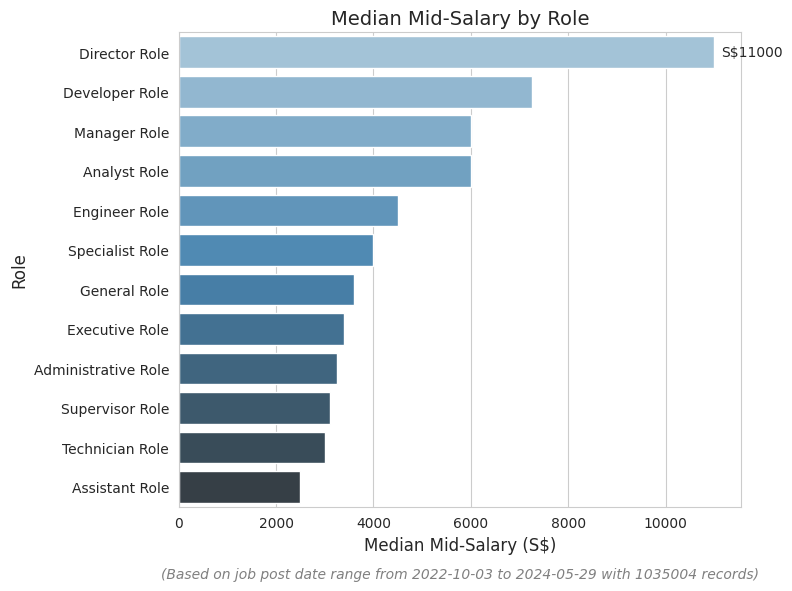

In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 1. Salary Benchmark by Role ( Table & Barplot chart)

#Retrieve basic information from main_df for chart information
start_date = main_df['metadata_originalPostingDate'].min().date()
end_date = main_df['metadata_originalPostingDate'].max().date()
total_rows=len(main_df)

# Group by 'mock_role' and calculate the Median mid-point salary
role_benchmark = (
    main_df.groupby('mock_role')['mid_salary']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)
role_benchmark.rename(columns={'mid_salary': 'median_mid_salary'}, inplace=True)
display(Markdown('# Median Mid Salary by Role'))
display(role_benchmark)


# Generate Role Benchmark Chart
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='median_mid_salary',
    y='mock_role',
    data=role_benchmark,
    hue='mock_role', # To supress Seaborn deprecation warning
    palette='Blues_d',
    legend=False
)
ax.set_title('Median Mid-Salary by Role', fontsize=14)
ax.text(
    # x=0.5 places the text horizontally in the middle of the plot area
    x=0.5,
    # y=-0.15 places the text below the x-axis label. Adjust this number if needed.
    y=-0.15,
    # The 's' argument is the string content
    s=f'(Based on job post date range from {start_date} to {end_date} with {total_rows} records)',

    # Matplotlib's standard way to make text italic
    style='italic',

    # Set the size and color
    fontsize=10,
    color='gray',

    # Center the text horizontally
    ha='center',

    # Important: Use ax.transAxes to make x and y relative to the plot area
    transform=ax.transAxes
)


ax.set_xlabel('Median Mid-Salary (S$)', fontsize=12)
ax.set_ylabel('Role', fontsize=12)
ax.bar_label(ax.containers[0], fmt='S$%.0f', padding=5)
plt.tight_layout()
plt.savefig('role_benchmark_chart.png')
plt.show()
plt.close()


# Main Data Capped at S$100000

,metadata_originalPostingDate,salary_minimum,salary_maximum,mid_salary
count,1034695,"1,034,695","1,034,695","1,034,695"
mean,2023-11-01 02:12:04.923189504,"3,837","5,592","4,714"
min,2022-10-03 00:00:00,500,500,500
25%,2023-07-21 00:00:00,"2,500","3,400","2,950"
50%,2023-10-30 00:00:00,"3,000","4,500","3,850"
75%,2024-02-20 00:00:00,"4,500","6,500","5,500"
max,2024-05-29 00:00:00,"95,000","99,999","95,000"
std,NaN,"2,393","3,778","3,028"


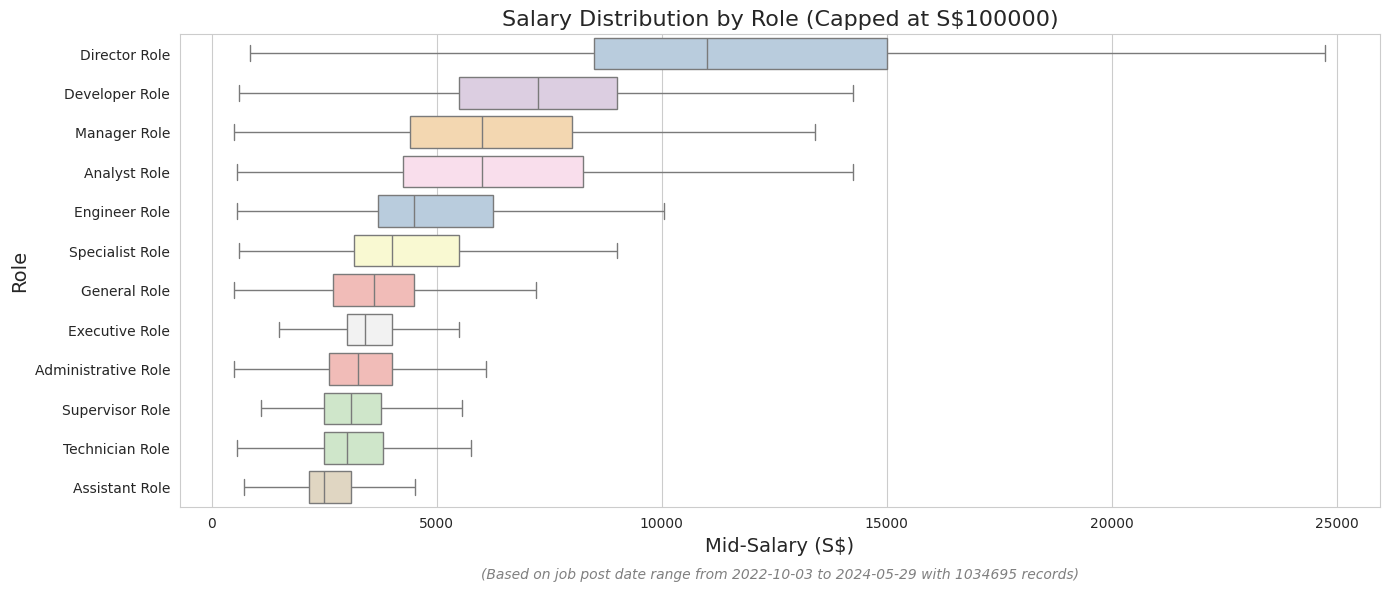

In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 2. Salary Benchmark by Role Capped by 100k ( Table & Boxplot chart), as salary range (500 ~ 376k) is too wide for Boxplot chart

# Calculate the order based on median salary for roles
CAPPED_MID_SALARY=100_000
capped_main_df = main_df[ (main_df['salary_maximum'] < CAPPED_MID_SALARY) ].copy() # we use copy() as separate copy to avoid being view or link to main_df()


#Retrieve basic information from capped_main_df for chart information
start_date = capped_main_df['metadata_originalPostingDate'].min().date()
end_date = capped_main_df['metadata_originalPostingDate'].max().date()
total_rows=len(capped_main_df)

role_order = capped_main_df.groupby('mock_role')['mid_salary'].median().sort_values(ascending=False).index


display(Markdown(f'# Main Data Capped at S${CAPPED_MID_SALARY}'))
display(capped_main_df.describe())


# Generate Vertical Role Box Plot (Larger Size)
plt.figure(figsize=(14, len(role_order) * 0.5))
ax = sns.boxplot(
    x='mid_salary',  # Continuous data on X-axis (Salary)
    y='mock_role',   # Categorical data on Y-axis (Roles)
    data=capped_main_df,
    order=role_order,
    palette='Pastel1',
    hue='mock_role',
    showfliers=False #remove outlier to avoid occupying too much info on the boxplot chart
)
ax.set_title(f'Salary Distribution by Role (Capped at S${CAPPED_MID_SALARY})', fontsize=16)
ax.text(
    # x=0.5 places the text horizontally in the middle of the plot area
    x=0.5,
    # y=-0.15 places the text below the x-axis label. Adjust this number if needed.
    y=-0.15,
    # The 's' argument is the string content
    s=f'(Based on job post date range from {start_date} to {end_date} with {total_rows} records)',

    # Matplotlib's standard way to make text italic
    style='italic',

    # Set the size and color
    fontsize=10,
    color='gray',

    # Center the text horizontally
    ha='center',

    # Important: Use ax.transAxes to make x and y relative to the plot area
    transform=ax.transAxes
)
ax.set_xlabel('Mid-Salary (S$)', fontsize=14)
ax.set_ylabel('Role', fontsize=14)
# Remove the redundant legend
if ax.legend_: ax.legend_.remove()
plt.tight_layout()
plt.savefig('role_benchmark_boxplot_horizontal.png')
plt.show()
plt.close()

Data Analysis Part B:

We then work on Salary Benchmark by Skill
1. To work on salary benchmark by skill, we need to explode skill so that each skill for each row
2. Salary Benchmark(Median) by Skill ( Table & Barplot chart) using exploded_skill data
2. Salary Benchmark(Average) by Role and Skills (Heatmap chart) using exploded_skill data


---



Here is the explanation for why we use Median for the individual charts and Average (Mean) for the Heatmap in this specific salary analysis exercise:

A. Median (Bar Plot and Box Plot)
* We use the Median for the bar plot and the box plot because salary data is inherently prone to being skewed by outliers.

* Definition: The median is the 50th percentile—the exact middle value when the data is sorted.

* Why it's Better for Individual Benchmarks:

* Resilience to Outliers: Even though we filtered the most ridiculous salaries (the 5M entry), the remaining high-end salaries (the 150k-200k outliers) still strongly pull the average (mean) up.

* The median gives you a truer sense of what a typical person in that role or with that skill is paid, as it is unaffected by those few extremely high salaries.

* The Box Plot is specifically designed around quartiles and the median (the line inside the box), so using the median in the corresponding bar chart provides consistency.


B. Average (Mean) for the Heatmap
* We switch to the Average (Mean) for the heatmap because the heatmap's primary purpose is to show the total value potential at the intersection of a specific role and skill.

* Definition: The mean is the mathematical average (sum of all salaries divided by the count).

* Why it's Better for Cross-Sectional Overview:

* Showing Total Pull: The mean is sensitive to outliers. In a heatmap, this sensitivity is a feature, not a bug. If a specific Role + Skill combination is rare but is associated with the highest-paid jobs, the Mean will spike that cell's value, visually highlighting where the most lucrative opportunity exists.

* Overall Value: It gives a clearer sense of the expected monetary value associated with combining that specific role and skill set across the entire sample group.

In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 1. To do salary benchmark by skill, we need to explode skill so that each skill for each row

exploded_skill_main_df = main_df.copy()  # we use copy() as separate copy to avoid being view or link to main_df()
#To achieve accurate benchmarking on skill, job post with multiple skills are to be splitted to each skill for each row
# Split the skills string by comma and optional whitespace
exploded_skill_main_df['mock_skills'] = exploded_skill_main_df['mock_skills'].str.split(r',\s*')
# Create new rows for each individual skill
exploded_skill_main_df = exploded_skill_main_df.explode('mock_skills', ignore_index=True)
# Clean up any residual whitespace
exploded_skill_main_df['mock_skills'] = exploded_skill_main_df['mock_skills'].str.strip()

#Retrieve basic information from capped_main_df for chart information
start_date = exploded_skill_main_df['metadata_originalPostingDate'].min().date()
end_date = exploded_skill_main_df['metadata_originalPostingDate'].max().date()
total_rows=len(exploded_skill_main_df)

#Review again if sample data look fine
display(Markdown("# Main Data Sample"))
display(main_df.head(10) )
display(Markdown("# Main Data Sample with Exploded Skill"))
display(exploded_skill_main_df.head(10) )

# Main Data Sample

,categories,positionLevels,title,metadata_originalPostingDate,salary_minimum,salary_maximum,mid_salary,mock_role,mock_skills
0,"Environment / Health, Manufacturing, Sciences ...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800,"2,400",Administrative Role,"Scheduling, Excel"
1,Information Technology,Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500,"4,750",Engineer Role,"CIM, Java"
2,Repair and Maintenance,Senior Executive,Senior Technician,2023-04-08,3800,4600,"4,200",Technician Role,"CNC, Troubleshooting"
3,Information Technology,Senior Executive,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",2023-04-08,5000,10000,"7,500",Developer Role,.NET
4,Admin / Secretarial,Non-executive,Sales / Admin Cordinator,2023-04-08,2400,3400,"2,900",Administrative Role,Excel
5,"Consulting, Information Technology, Profession...",Junior Executive,Software Support Engineer,2023-04-08,4000,6000,"5,000",Engineer Role,Java
6,Information Technology,Manager,Urgent Hiring!!! Business Development Manager ...,2023-04-08,8000,10000,"9,000",Manager Role,MES
7,Security and Investigation,Senior Executive,IT Security Engineer (Maritime/ Cloud Security),2023-04-08,6500,7000,"6,750",Engineer Role,Network
8,"Accounting / Auditing / Taxation, Logistics / ...",Manager,Assistant Sales Manager (Hunter Role)- Up to $...,2023-04-04,3000,5500,"4,250",Manager Role,Communication
9,"Consulting, Events / Promotions, Logistics / S...",Junior Executive,"Car Leasing, RM – West|Entry Level | Up to Bas...",2023-04-04,2500,7000,"4,750",Specialist Role,Excel


# Main Data Sample with Exploded Skill

,categories,positionLevels,title,metadata_originalPostingDate,salary_minimum,salary_maximum,mid_salary,mock_role,mock_skills
0,"Environment / Health, Manufacturing, Sciences ...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800,"2,400",Administrative Role,Scheduling
1,"Environment / Health, Manufacturing, Sciences ...",Executive,Food Technologist - Clementi | Entry Level | U...,2023-03-30,2000,2800,"2,400",Administrative Role,Excel
2,Information Technology,Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500,"4,750",Engineer Role,CIM
3,Information Technology,Executive,"Software Engineer (Fab Support) (Java, CIM, Up...",2023-04-08,4000,5500,"4,750",Engineer Role,Java
4,Repair and Maintenance,Senior Executive,Senior Technician,2023-04-08,3800,4600,"4,200",Technician Role,CNC
5,Repair and Maintenance,Senior Executive,Senior Technician,2023-04-08,3800,4600,"4,200",Technician Role,Troubleshooting
6,Information Technology,Senior Executive,"Senior .NET Developer (.NET Core, MVC, MVVC, S...",2023-04-08,5000,10000,"7,500",Developer Role,.NET
7,Admin / Secretarial,Non-executive,Sales / Admin Cordinator,2023-04-08,2400,3400,"2,900",Administrative Role,Excel
8,"Consulting, Information Technology, Profession...",Junior Executive,Software Support Engineer,2023-04-08,4000,6000,"5,000",Engineer Role,Java
9,Information Technology,Manager,Urgent Hiring!!! Business Development Manager ...,2023-04-08,8000,10000,"9,000",Manager Role,MES


# Top 10 Median Mid Salary by Skill

,mock_skills,median_mid_salary
0,Cloud,"8,000"
1,MES,"8,000"
2,Scrum,"7,250"
3,.NET,"7,000"
4,C#,"7,000"
5,Finance,"6,950"
6,SQL,"6,250"
7,Data Analysis,"6,000"
8,Agile,"6,000"
9,Budgeting,"6,000"


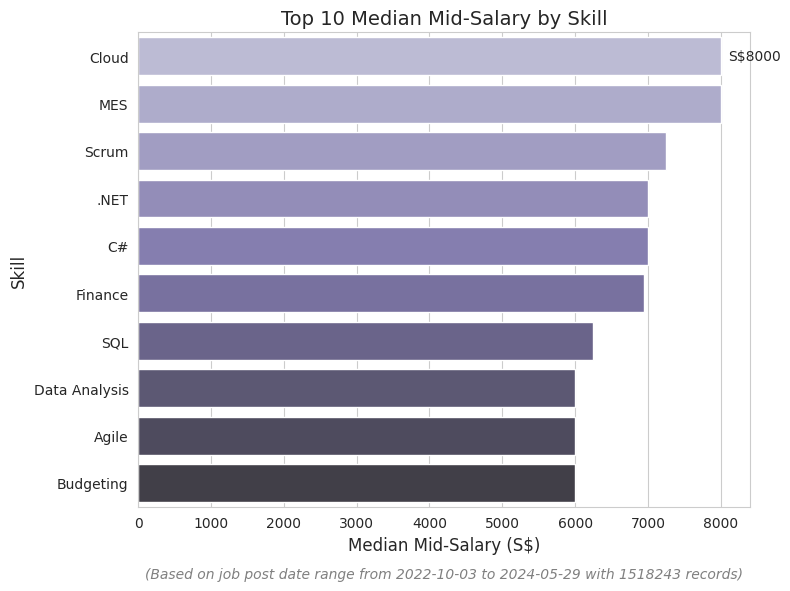

In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 2. Salary Benchmark by Skill ( Table & Barplot chart) using exploded_skill data

# Group by individual skill and calculate the average mid-point salary
skill_benchmark = (
    exploded_skill_main_df.groupby('mock_skills')['mid_salary']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)
skill_benchmark.rename(columns={'mid_salary': 'median_mid_salary'}, inplace=True)

#As there are too many skills, we only listed the top N, which N can be configurable
TOP_N=10

# Select the top N skills for visualization
top_n_skill_benchmark = skill_benchmark.head(TOP_N)
display(Markdown(f'# Top {TOP_N} Median Mid Salary by Skill'))
display(top_n_skill_benchmark)

# Generate Skill Benchmark Chart
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='median_mid_salary',
    y='mock_skills',
    data=top_n_skill_benchmark,
    hue='mock_skills', # Fix for Seaborn deprecation warning
    palette='Purples_d',
    legend=False
)
ax.set_title(f'Top {TOP_N} Median Mid-Salary by Skill', fontsize=14)
ax.text(
    # x=0.5 places the text horizontally in the middle of the plot area
    x=0.5,
    # y=-0.15 places the text below the x-axis label. Adjust this number if needed.
    y=-0.15,
    # The 's' argument is the string content
    s=f'(Based on job post date range from {start_date} to {end_date} with {total_rows} records)',

    # Matplotlib's standard way to make text italic
    style='italic',

    # Set the size and color
    fontsize=10,
    color='gray',

    # Center the text horizontally
    ha='center',

    # Important: Use ax.transAxes to make x and y relative to the plot area
    transform=ax.transAxes
)
ax.set_xlabel('Median Mid-Salary (S$)', fontsize=12)
ax.set_ylabel('Skill', fontsize=12)
ax.bar_label(ax.containers[0], fmt='S$%.0f', padding=5)
plt.tight_layout()
plt.savefig('skill_benchmark_chart.png')
plt.show()
plt.close()

# Avarage Mid Salary by  10  Role and 10 Skill

,mock_role,mock_skills,avg_mid_salary
0,Administrative Role,.NET,"8,250"
1,Administrative Role,Agile,"7,667"
2,Administrative Role,C#,"7,000"
6,Administrative Role,Cloud,"8,174"
10,Administrative Role,Finance,"7,411"
19,Administrative Role,SQL,"6,724"
23,Analyst Role,.NET,"6,912"
24,Analyst Role,Agile,"8,104"
25,Analyst Role,C#,"5,186"
30,Analyst Role,Cloud,"10,668"


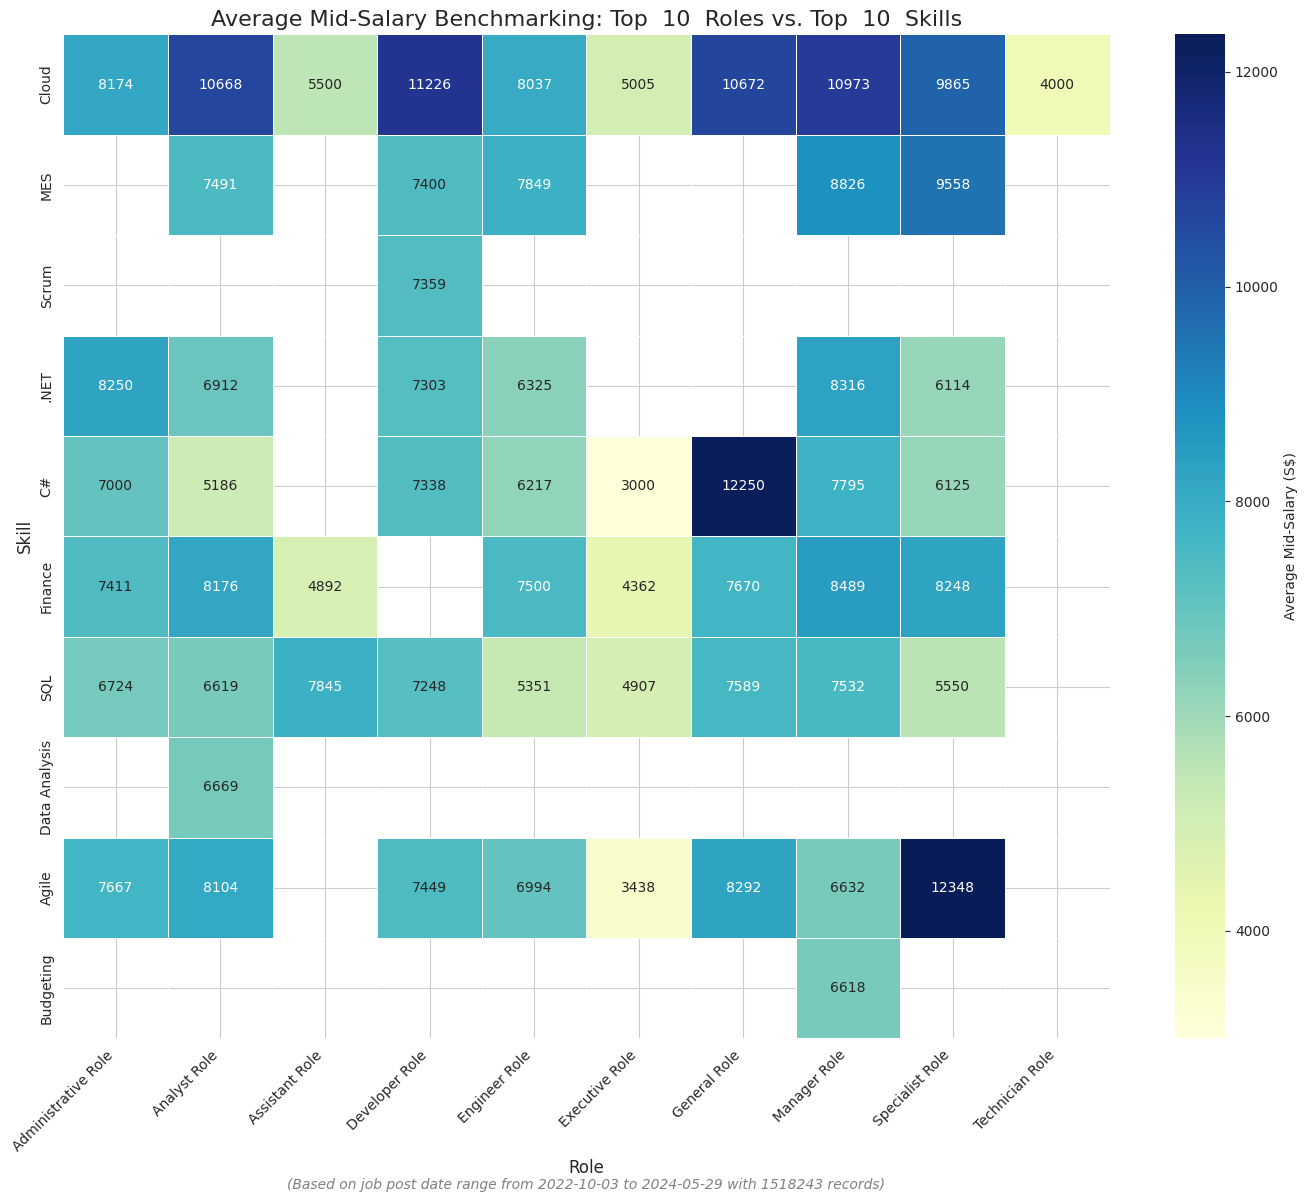

In [ ]:
#Before continue, please confirm if your original data is fully or partially loaded

# 3. Salary Benchmark by Role and Skills (Heatmap chart) using exploded_skill data

# Group by individual skill and calculate the average mid-point salary


# Group by both 'mock_role' and 'mock_skills'

role_skill_benchmark_combined = (
    exploded_skill_main_df.groupby(['mock_role', 'mock_skills'])['mid_salary']  # We use exploded_skill_main_df dataset for the table and chart
    .mean() #we use average for heatmap
    .reset_index()
)
role_skill_benchmark_combined.rename(columns={'mid_salary': 'avg_mid_salary'}, inplace=True)

#As there are too many roles and skills, we only listed the top N Roles and Skills, which N can be configurable
TOP_N_ROLE=10
TOP_N_SKILL=10


# Define Top N for visualization
top_roles = exploded_skill_main_df['mock_role'].value_counts().head(TOP_N_ROLE).index.tolist()
top_skills = skill_benchmark['mock_skills'].head(TOP_N_SKILL).tolist() # Re-Use the skill_benchmark dataframe that already sorted skill list

# Filter and pivot data for Heatmap
heatmap_data = role_skill_benchmark_combined[
    role_skill_benchmark_combined['mock_role'].isin(top_roles) &
    role_skill_benchmark_combined['mock_skills'].isin(top_skills)
]

heatmap_pivot = heatmap_data.pivot_table(
    index='mock_skills',
    columns='mock_role',
    values='avg_mid_salary'
).reindex(index=top_skills) # Reorder rows by salary rank
display(Markdown(f'# Avarage Mid Salary by  {TOP_N_ROLE}  Role and {TOP_N_SKILL} Skill'))
display(heatmap_data)


# Generate Heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(14, 12))
ax=sns.heatmap(
    heatmap_pivot,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Average Mid-Salary (S$)'}
)
plt.title(f'Average Mid-Salary Benchmarking: Top  {TOP_N_ROLE}  Roles vs. Top  {TOP_N_SKILL}  Skills', fontsize=16)
ax.text(
    # x=0.5 places the text horizontally in the middle of the plot area
    x=0.5,
    # y=-0.15 places the text below the x-axis label. Adjust this number if needed.
    y=-0.15,
    # The 's' argument is the string content
    s=f'(Based on job post date range from {start_date} to {end_date} with {total_rows} records)',

    # Matplotlib's standard way to make text italic
    style='italic',

    # Set the size and color
    fontsize=10,
    color='gray',

    # Center the text horizontally
    ha='center',

    # Important: Use ax.transAxes to make x and y relative to the plot area
    transform=ax.transAxes
)
plt.xlabel('Role', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('combined_benchmark_heatmap.png')
plt.show()
plt.close()